In [6]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
%matplotlib inline

from IPython.display import Image

http://www.people.fas.harvard.edu/~djmorin/waves/dispersion.pdf

Brink 1982 https://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281982%29012%3C0897%3AACOLCT%3E2.0.CO%3B2

Brink 1991

Brink 1980

Wang and Mooers 1976 https://journals.ametsoc.org/doi/pdf/10.1175/1520-0485%281976%29006%3C0853%3ACTWIAC%3E2.0.CO%3B2

desc of using program https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015JC011277

# Finding wavenumbers

In [7]:
dispersion_data = np.loadtxt('/ocean/imachuca/CTW_Brink/dispc.dat')
wavenumber = dispersion_data[:, 0] #rad/cm
frequency = dispersion_data[:, 1] #rad/sec
frequency_2 = dispersion_data[:, 2] #rad/sec

In [8]:
# test 1
k_test_1 = 1.888e-07
ind_1 = np.where(wavenumber==k_test_1)[0][0]

# test 2
ind_2 = 90

frequency min  -2.4300698e-16 frequency max  2.0096885e-05 

frequency min  -99898071.0 frequency max  4.8465336e-06 

test 1 ---- wavenumber, frequency
 1.888e-07 1.0398498e-05
test 2 ---- wavenumber, frequency
 4.602e-07 2.0012274e-05


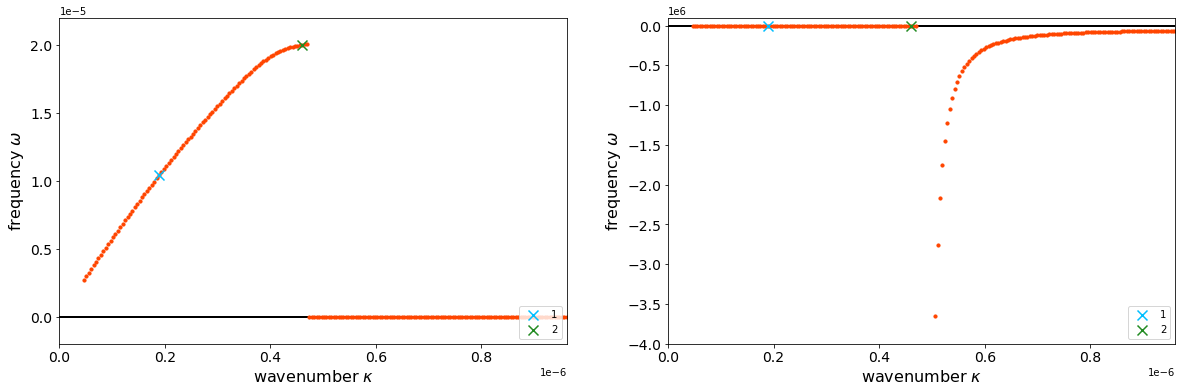

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

for ax, freq in zip([ax1, ax2], [frequency, frequency_2]):
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.scatter(wavenumber, freq, marker='.', s=40, c='orangered', zorder=2)
    ax.set_xlabel('wavenumber $\kappa$', fontsize=16)
    ax.set_ylabel('frequency $\omega$', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(0, wavenumber.max())
    if ax == ax1:
        ax.set_ylim(-0.2e-5, 2.2e-5)
    if ax == ax2:
        ax.set_ylim(-0.4e7, 0.1e6)
        
    print('frequency min ', freq.min(), 'frequency max ', freq.max(), '\n')
    
    for ind, n, c in zip([ind_1, ind_2], np.arange(2), ['deepskyblue', 'forestgreen']):
        ax.scatter(wavenumber[ind], freq[ind], marker='x', s=100, c=c, zorder=2, label=str(n+1))
    ax.legend(loc=4)

for ind, n in zip([ind_1, ind_2], np.arange(2)):
    print('test '+str(n+1)+' ---- wavenumber, frequency\n', wavenumber[ind], frequency[ind])

# kelvin dispersion    
c = np.sqrt((9.81*100)*(80*100))
w = c*wavenumber
ax1.plot(wavenumber, w)

# Test 1

```matlab

Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 1.888e-07rad cm^-1
 
wr, rrr = 1.0398e-05   3.4107e-30
wr, rrr = 1.0918e-05   2.1527e-25
wr, rrr = 9.8786e-06   2.6439e-25
wr, rrr = 1.0658e-05   1.2576e-25
wr, rrr = 1.0139e-05   1.9191e-25
wr, rrr = 1.0528e-05   5.2632e-26
wr, rrr = 1.0269e-05   7.5470e-26
wr, rrr = 1.0463e-05   1.6890e-26
wr, rrr = 1.0334e-05   2.0215e-26
wr, rrr = 1.0431e-05   4.7798e-27
wr, rrr = 1.0366e-05   4.8596e-27
wr, rrr = 1.0415e-05   1.3099e-27
wr, rrr = 1.0382e-05   1.1280e-27
wr, rrr = 1.0390e-05   2.4828e-28
 
Converged!
 
wr, rrr = 1.0398e-05   3.4107e-30
Perturbation frictional decay time (sec) = 6.4125e+05
 
EKE = 1.3544e+13     EPE = 7.1374e+12
Surface EPE = 2.0375e+10
```

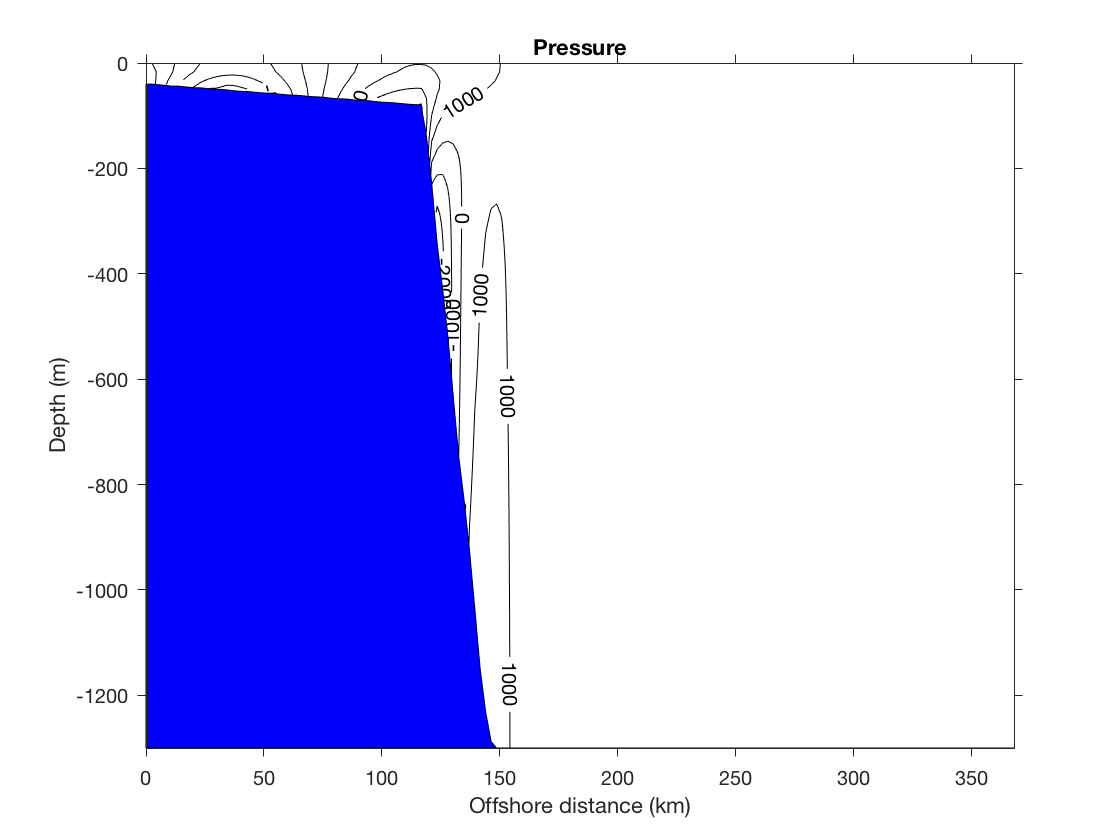

In [10]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig1.png", width=600)

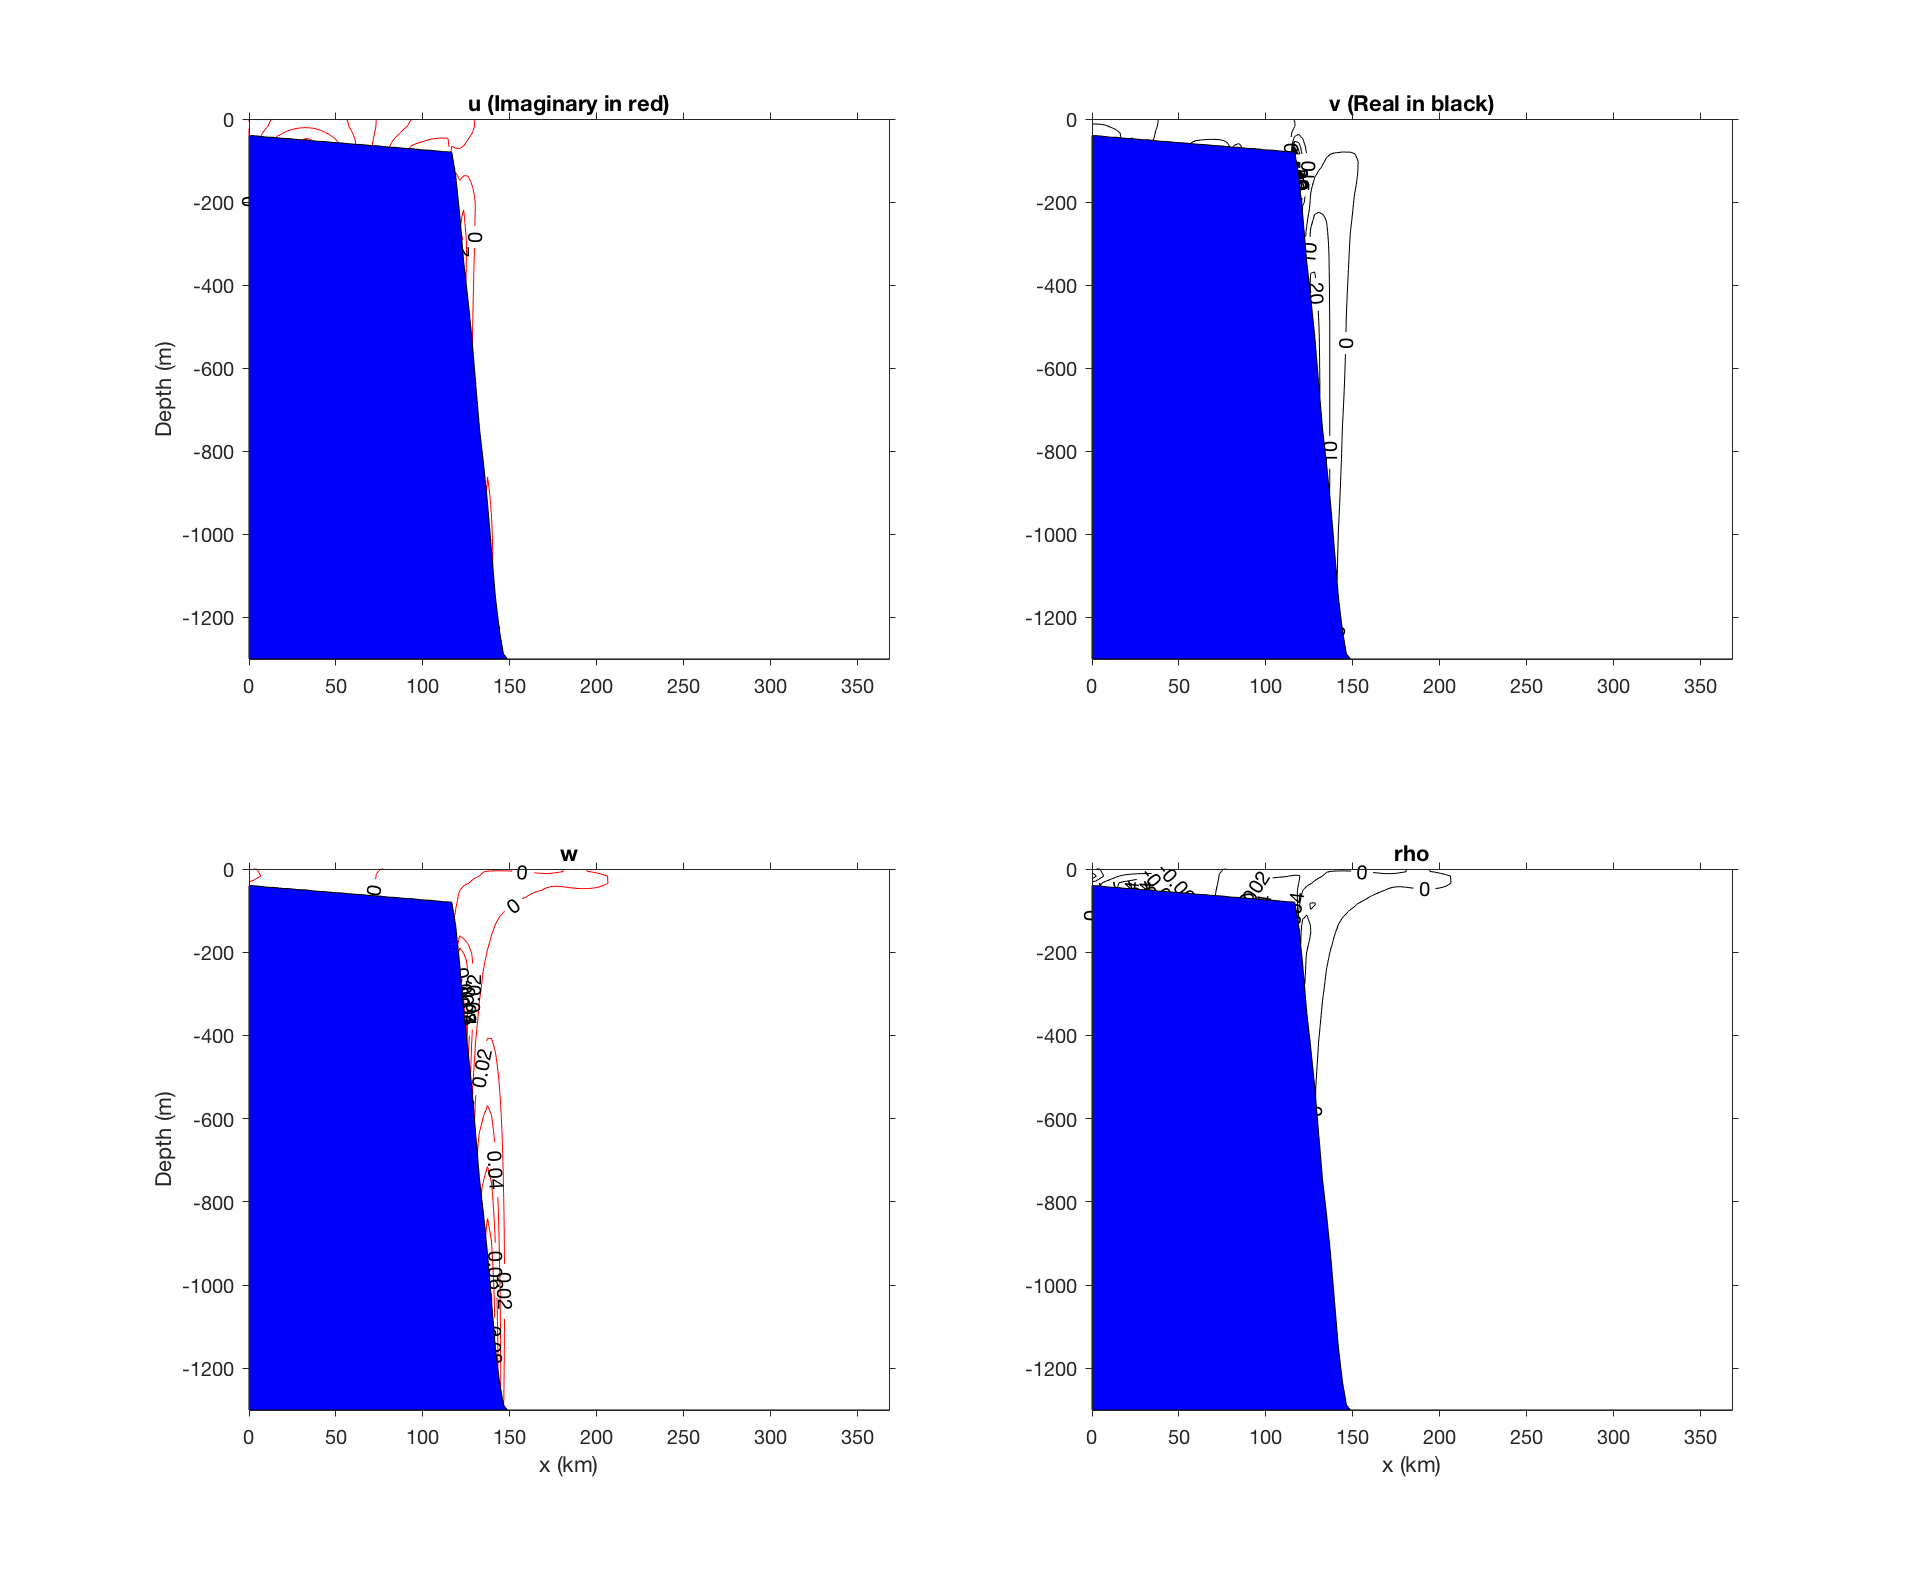

In [11]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig3.png", width=600)

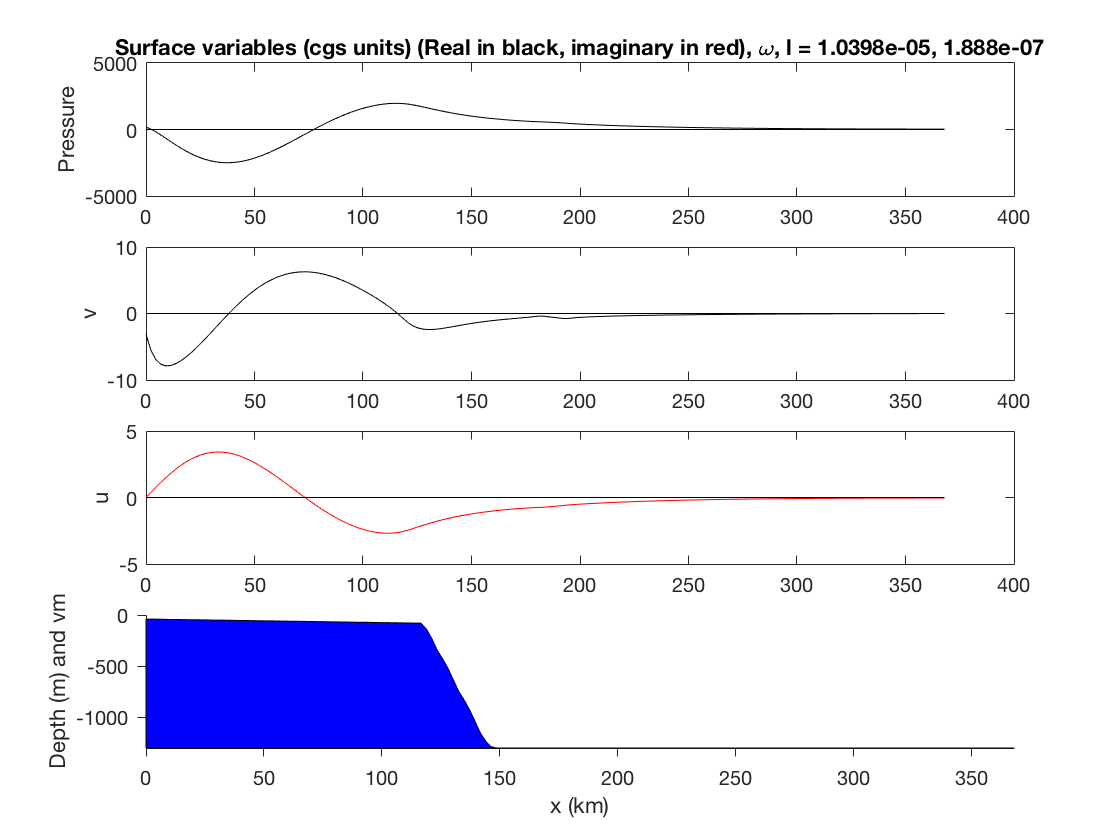

In [12]:
Image("/ocean/imachuca/CTW_Brink/test_1/fig4.png", width=600)

# Test 2

```matlab
Free surface
Closed BC at x = 0
Open BC at x = xmax
f = 1.3680e-04rad sec^-1
nn, mm = 164  80
 
 Max consistency ratio = 32.9921 at x = 118.8571 km
         This should be kept less than one, and definitely less than 10
 
 
Wavenumber = 4.602e-07rad cm^-1
 
wr, rrr = 2.0012e-05   2.4529e-28
wr, rrr = 2.1013e-05   2.8784e-24
wr, rrr = 1.9012e-05   2.3698e-24
wr, rrr = 1.9512e-05   2.4941e-24
wr, rrr = 2.0513e-05   2.7414e-24
wr, rrr = 1.9512e-05   2.4941e-24
wr, rrr = 1.9762e-05   2.5503e-24
wr, rrr = 2.0262e-05   2.6591e-24
wr, rrr = 1.9762e-05   2.5503e-24
wr, rrr = 1.9887e-05   2.5448e-24
wr, rrr = 2.0137e-05   2.5703e-24
wr, rrr = 1.9950e-05   2.4043e-24
wr, rrr = 2.0075e-05   2.3668e-24
wr, rrr = 2.0044e-05   1.8395e-24
wr, rrr = 1.9981e-05   1.9206e-24
wr, rrr = 2.0028e-05   9.8052e-25
 
Converged!
 
wr, rrr = 2.0012e-05   2.4529e-28
Perturbation frictional decay time (sec) = 2.0633e+05
 
EKE = 1.0532e+13     EPE = 5.2046e+12
Surface EPE = 4.1004e+10
```

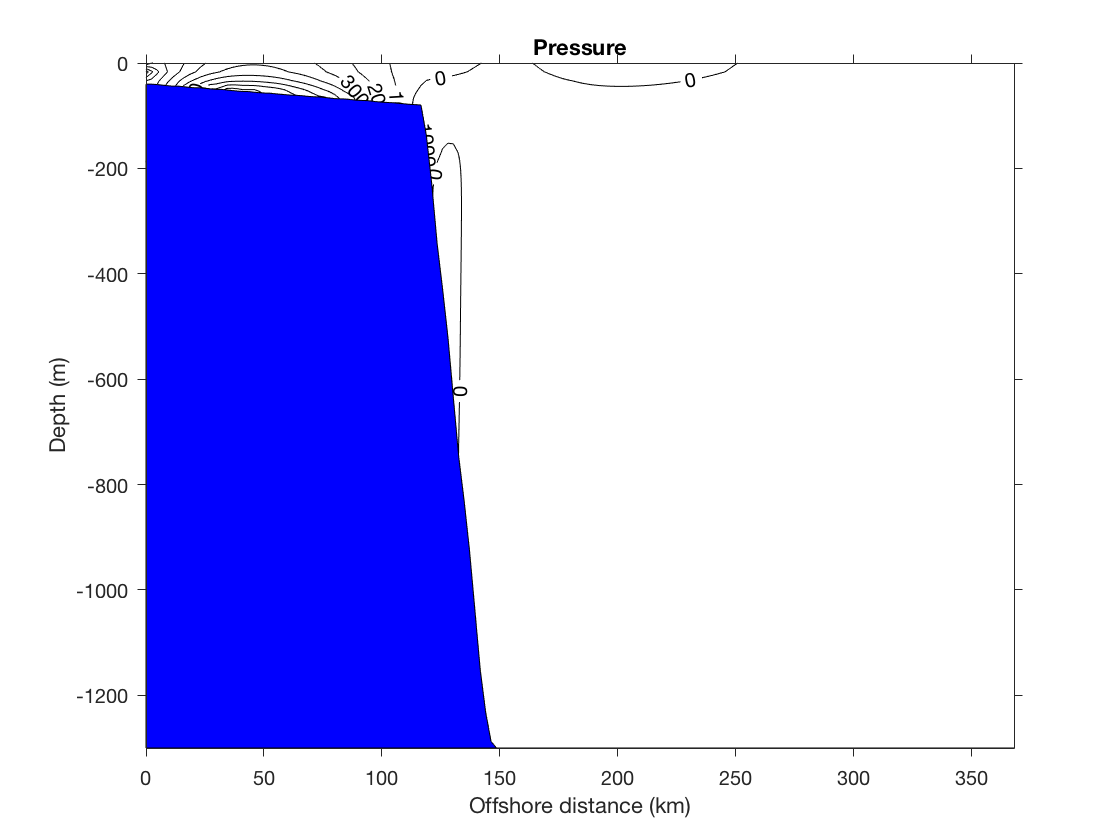

In [13]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig1.png", width=600)

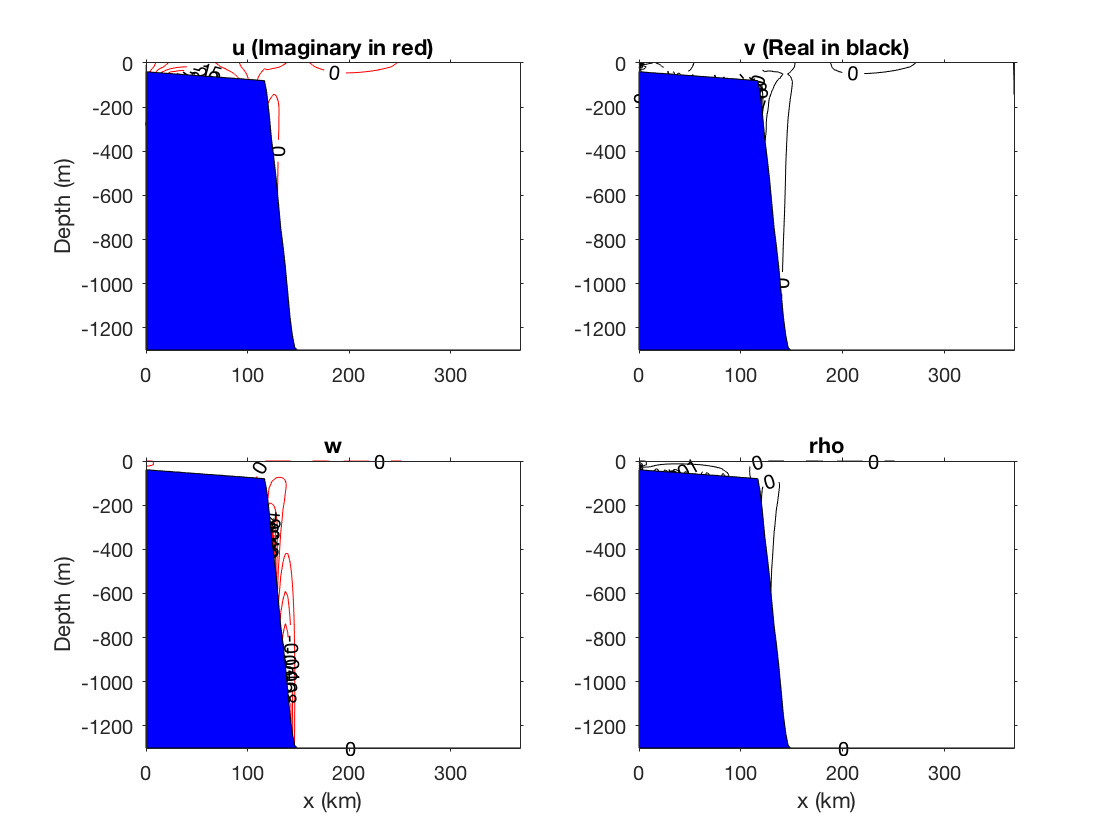

In [14]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig3.png", width=600)

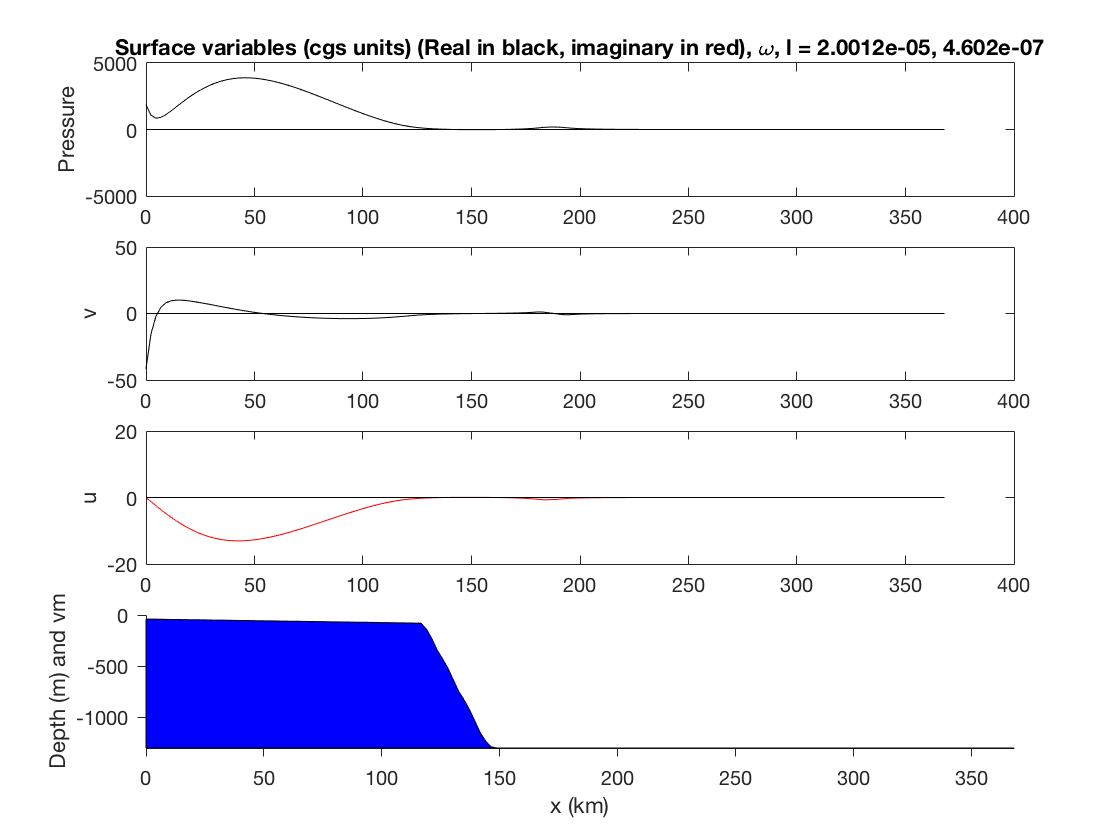

In [15]:
Image("/ocean/imachuca/CTW_Brink/test_2/fig6.png", width=600)

# Burger and EKE/EPE

In [16]:
N_shelf = [0.00452424, 0.00121879, 0.00056482, 0.00049661, 0.00030011,
           0.00043938, 0.00042318, 0.0003453 , 0.00034772, 0.00026242]

N = np.mean(N_shelf)
print(N)

0.0008922569999999998


In [17]:
H = 80
f = 0.0001368
L = 150*1000 # Brink program "domain width"

Bu = ((N*H)/(f*L))**2

print(Bu) # barotropic

1.2100552178242872e-05


In [18]:
eke1 = 1.3544e+13
epe1 = 7.1374e+12
R = eke1/epe1
print(R) # shelf wave

eke2 = 1.0532e+13
epe2 = 5.2046e+12

R = eke2/epe2
print(R) #shelf wave

1.8976097738672346
2.0235945125465933
